# Lab 9 - Linearizing Data and Fitting Functions
        June 28, 2018
        
[<< Table of Contents](index.html)

## P9.1 
Using Python, create two plots of the data from the book (h vs. t):
- (a) One plot of the data exactly as it was recorded.
- (b) One linearized plot of the data. (Note that you will be squaring a list of numbers, which means you will need to use an array)

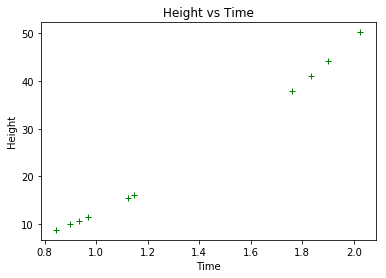

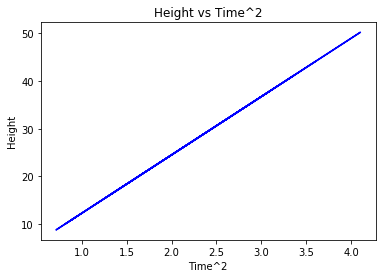

In [64]:
import numpy as np
from matplotlib import pyplot as plt

# THE DATA
h = np.array([
    44.19995677,  8.73991549, 11.49192912,  9.91067308, 37.91439074,
    15.47046519, 41.17216319, 10.68610783, 50.25852089, 16.16540785
])
t = np.array([
    1.89951566,  0.84466709,  0.96856423,  0.89946347,  1.75927607,
    1.12378606,  1.8333011,   0.93398894,  2.02552127,  1.14874938
])

def plot_nice(y , y_name,  x, x_name, marker = 'b-', defer = False):
    plt.title(y_name + ' vs ' + x_name)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.plot(x, y, marker)
    if not defer: plt.show()

# (a) One plot of the data exactly as it was recorded.
plot_nice(h, 'Height', t,    'Time', 'g+')
plot_nice(h, 'Height', t**2, 'Time^2')

> The second plot looks like a line, this is most likely a squared function.

## P9.2

Least-squared error is caculated using the following function:

<sub>9.3</sub>
$$
\sum_{i=1}^{N} (h_i - h(t_i))^2
$$
<br>

##### (a) After pondering on the meaning of equation 9.3, write down some notes as comments in your python file and discuss with your group.

> We agreed that this is one of the simplest ways to quantify error. You find the difference between the ideal and the acutal, and propogate that error.

##### (b) Look at figure 9.1 and identify the quantity $h_i - h(t_i)$ on the plot. Recreate the figure in your lab notebook to help with the explanation and and discuss with your group.

> Below is the marked quantity $h_i - h(t_i)$. This represents the one directional distance from the ideal curve.

![Figure 9.1](lab9_fig1.png)

##### (c) Read chapter 12 in the python book to learn more about how to fit data to a curve in Python.

> I took a machine learning class in Python, so I just looked over it.

##### (d) Apply what you learned from chapter 12 to the fall-times data given above to determine the acceleration due to gravity on the unknown planet. What planet were you on?

In [65]:
import scipy.optimize as opt

# use the opimization algorithm to fit the funtion h = (at^2)/2
a = opt.curve_fit((lambda t,a : 0.5 * a * (t**2)),t,h)[0][0]
print ("acceleration is {:.2f}m/s^2".format(a))

acceleration is 24.50m/s^2


> We are on [Jupiter](https://en.wikipedia.org/wiki/Jupiter)

## P9.3 
Using the collection of wood disks made available to you:
- (a) Measure the diameter and circumference of each disk.
- (b) Use Python to plot the circumferences vs. the diameters
- (c) Fit the data to the following function where C is the circumference and d is the diameter. Use Python to determine the value of a that makes the function fit to the data.

<sub>9.4</sub>$$C=ad$$<br>

- (d) Make a plot that includes the data and the fit function on one plot.

PI is 3.16


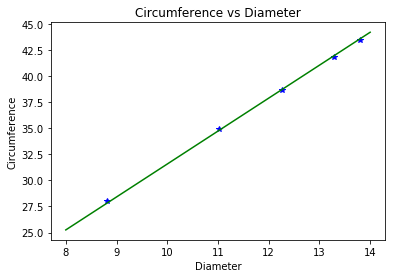

In [66]:
# Measurements:
d = np.array([
  8.815,11.03,12.255,13.28,13.8
])
C = np.array([
  28,34.9,38.7,41.8,43.5
])

# plot the circumferences vs. the diameters
plot_nice(C,'Circumference', d, 'Diameter', 'b*', defer = True)

# we know the ratio is PI, so lets its already a linear relationship.
pi = opt.curve_fit((lambda d,pi : d * pi), d,C)[0][0]
print ("PI is {:.2f}".format(pi))

# Make a plot that includes the data and the fit function on one plot.
x = np.array([8,14])
plt.plot(x,x*pi, 'g-')
plt.show()

## P9.4 

<sub>9.5</sub>$$m=ad$$<br>

Using the collection of metal spheres made available to you:

- Measure the mass and diameter of each sphere. Use Python to plot the diameters vs. the masses.
- After looking at the plot and maybe doing a little pencil and paper work, linearize the data set. Plot it to prove that you’ve linearized it correctly.
- Fit the data to the following function where d is the diameter and m is the mass. Use Python to determine the value of a the makes the function fit to the data. Interpret your results.
- Using Python, make a plot that includes the data and the fit function on one plot.
- What material are the spheres made out of.

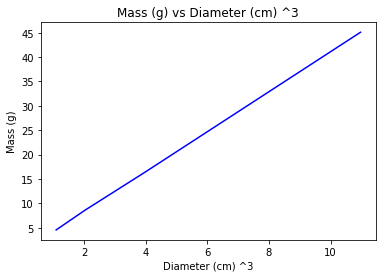

constant is 4.116535261191222


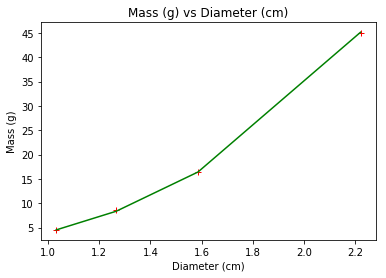

density is 7.86g/cm^3


In [67]:
# Measurements:
d = np.array([ # cm
  1.031, 1.266, 1.586, 2.222
])
m = np.array([ # g
  4.565,  8.60, 16.45, 45.10
])

# lineraize the dataset. Since we know density is grams per cm cubed, we know that this is a cubed relationship:
plot_nice(m,'Mass (g)', d**3, 'Diameter (cm) ^3', 'b-')

# fit the data to our function to find density
constant = opt.curve_fit((lambda d,a : a*(d**3)), d,m)[0][0]
print ("constant is {}".format(constant))

# Make a plot that includes the data and the fit function on one plot.
plot_nice(m,'Mass (g)', d, 'Diameter (cm)', 'r+', defer=True)
plt.plot(d,constant*(d**3), 'g-')
plt.show()

# calculate the density
density = rho * 6 / np.pi
print ("density is {:.2f}g/cm^3".format(density))

> Density of Iron is $7.87 \frac{g}{cm^3}$. The material is most likely iron.

# Take home thoughts:

> This was a successful lab. I did a lot of data fitting and analyitics in my machine learning class (CS 450). I think this lab was a good introduction to linearization. It was also a good oppertunity to solve a real life puzzel of "what is this material" in the last problem. I think this is probably the most fun I have had in a lab.

# Signing off 

- Kyle West
- Brandon Welch